### Data Preparation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a synthetic dataset (40 records for simplicity)
# We will create data for a "Student Success Prediction" problem
# Features: Hours Studied, Previous Scores
# Target: Pass (1) or Fail (0)
data = {
    'Hours_Studied': np.random.uniform(1, 10, 40), # Random float between 1 and 10
    'Previous_Scores': np.random.uniform(40, 100, 40),
    'Attendance_Percentage': np.random.uniform(50, 100, 40)
}

# Create DataFrame
df = pd.DataFrame(data)

# Add logic for target variable to make it learnable
# If (Hours > 5) AND (Scores > 60), likely to pass (1), else (0)
df['Target_Pass'] = np.where((df['Hours_Studied'] > 5) & (df['Previous_Scores'] > 60), 1, 0)

# Add some noise/randomness to simulate real-world data issues
random_indices = np.random.choice(df.index, size=5, replace=False)
df.loc[random_indices, 'Target_Pass'] = 1 - df.loc[random_indices, 'Target_Pass'] 

# Save to CSV
df.to_csv('student_data_40_records.csv', index=False)

print("Dataset created successfully: 'student_data_40_records.csv'")
print(df.head())

Dataset created successfully: 'student_data_40_records.csv'
   Hours_Studied  Previous_Scores  Attendance_Percentage  Target_Pass
0       2.769910        87.325618              75.090798            0
1       5.156946        41.238372              96.067016            0
2       3.558242        94.533599              71.620558            0
3       1.859309        59.468637              83.045940            0
4       7.589756        50.920710              74.701339            0


### Activation Functions

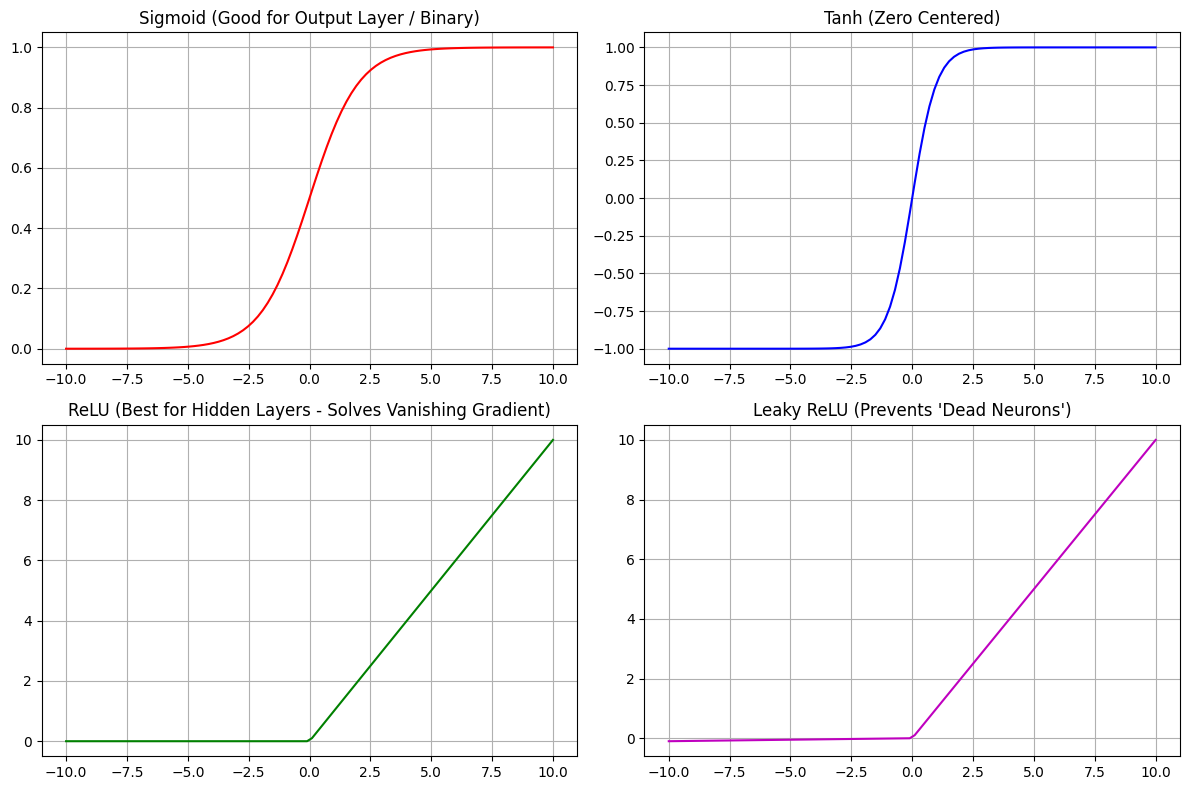

In [5]:
# Define range of values using numpy
z = np.linspace(-10, 10, 100)

# Define Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

# Plotting
plt.figure(figsize=(12, 8))

# Sigmoid Plot
plt.subplot(2, 2, 1)
plt.plot(z, sigmoid(z), 'r')
plt.title("Sigmoid (Good for Output Layer / Binary)")
plt.grid()

# Tanh Plot
plt.subplot(2, 2, 2)
plt.plot(z, tanh(z), 'b')
plt.title("Tanh (Zero Centered)")
plt.grid()

# ReLU Plot
plt.subplot(2, 2, 3)
plt.plot(z, relu(z), 'g')
plt.title("ReLU (Best for Hidden Layers - Solves Vanishing Gradient)")
plt.grid()

# Leaky ReLU Plot
plt.subplot(2, 2, 4)
plt.plot(z, leaky_relu(z), 'm')
plt.title("Leaky ReLU (Prevents 'Dead Neurons')")
plt.grid()

plt.tight_layout()
plt.show()